## Handwritten Image Detection with Keras using MNIST data

In this assignment we will work with image data: specifically the famous MNIST data set.  This data set contains 70,000 images of handwritten digits in grayscale (0=black, 255 = white).  The images are 28 pixels by 28 pixels for a total of 784 pixels.  This is quite small by image standards.  Also, the images are well centered and isolated.  This makes this problem solvable with standard fully connected neural nets without too much pre-work.

In the first part of this notebook, we will walk you through loading in the data, building a network, and training it.  Then it will be your turn to try different models and see if you can improve performance

In [3]:
# Preliminaries

from __future__ import print_function

from tensorflow import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.optimizers import RMSprop

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Let's explore the dataset a little bit

In [4]:
# Load the data, shuffled and split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [5]:
x_train[0].shape

(28, 28)

In [6]:
#Let's just look at a particular example to see what is inside

x_train[333]  ## Just a 28 x 28 numpy array of ints from 0 to 255

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  87, 138,
        170, 253, 201, 244, 212, 222, 138,  86,  22,   0,   0,   0,   0,
          0,   0],
       [  

In [7]:
# What is the corresponding label in the training set?
y_train[333]

8

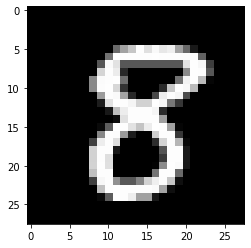

In [8]:
# Let's see what this image actually looks like

plt.imshow(x_train[333], cmap='Greys_r')

In [9]:
# this is the shape of the np.array x_train
# it is 3 dimensional.
print(x_train.shape, 'train samples')
print(x_test.shape, 'test samples')

(60000, 28, 28) train samples
(10000, 28, 28) test samples


In [10]:
## For our purposes, these images are just a vector of 784 inputs, so let's convert
x_train = x_train.reshape(len(x_train), 28*28)
x_test = x_test.reshape(len(x_test), 28*28)

## Keras works with floats, so we must cast the numbers to floats
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

## Normalize the inputs so they are between 0 and 1
x_train /= 255
x_test /= 255


In [11]:
# convert class vectors to binary class matrices (one-hot encoding)
num_classes = 10
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

y_train[333]  # now the digit k is represented by a 1 in the kth entry (0-indexed) of the length 10 vector 

array([0., 0., 0., 0., 0., 0., 0., 0., 1., 0.], dtype=float32)

In [12]:
# We will build a model with one hidden layer of size 64
# Fully connected inputs at each layer
# We will use dropout of .2 to help regularize
model_1 = Sequential()
model_1.add(Dense(64, activation='relu', input_shape=(784,)))
model_1.add(Dropout(0.2))
model_1.add(Dense(10, activation='softmax'))

In [13]:
## Note that this model has a LOT of parameters
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                50240     
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 10)                650       
                                                                 
Total params: 50,890
Trainable params: 50,890
Non-trainable params: 0
_________________________________________________________________


In [14]:
# Let's compile the model
learning_rate = .0015
model_1.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(lr=learning_rate),
              metrics=['accuracy'])
# note that `categorical cross entropy` is the natural generalization 
# of the loss function we had in binary classification case, to multi class case

C:\Users\Karakartal\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\optimizer_v2\rmsprop.py:130: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


In [15]:
# And now let's fit.

batch_size = 32  # mini-batch with 32 examples
epochs = 30
history = model_1.fit(
    x_train, y_train,
    batch_size=batch_size,
    epochs=epochs,
    verbose=1,
    validation_data=(x_test, y_test))

Epoch 1/30
1875/1875 [==============================] - 2s 751us/step - loss: 0.3234 - accuracy: 0.9056 - val_loss: 0.1713 - val_accuracy: 0.9503
Epoch 2/30
1875/1875 [==============================] - 1s 693us/step - loss: 0.1909 - accuracy: 0.9442 - val_loss: 0.1319 - val_accuracy: 0.9628
Epoch 3/30
1875/1875 [==============================] - 1s 697us/step - loss: 0.1637 - accuracy: 0.9544 - val_loss: 0.1254 - val_accuracy: 0.9665
Epoch 4/30
1875/1875 [==============================] - 1s 701us/step - loss: 0.1513 - accuracy: 0.9582 - val_loss: 0.1174 - val_accuracy: 0.9695
Epoch 5/30
1875/1875 [==============================] - 1s 696us/step - loss: 0.1423 - accuracy: 0.9624 - val_loss: 0.1197 - val_accuracy: 0.9709
Epoch 6/30
1875/1875 [==============================] - 1s 698us/step - loss: 0.1408 - accuracy: 0.9641 - val_loss: 0.1187 - val_accuracy: 0.9713
Epoch 7/30
1875/1875 [==============================] - 1s 694us/step - loss: 0.1337 - accuracy: 0.9652 - val_loss: 0.1249 -

In [16]:
## We will use Keras evaluate function to evaluate performance on the test set

score = model_1.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.18831394612789154
Test accuracy: 0.9721999764442444


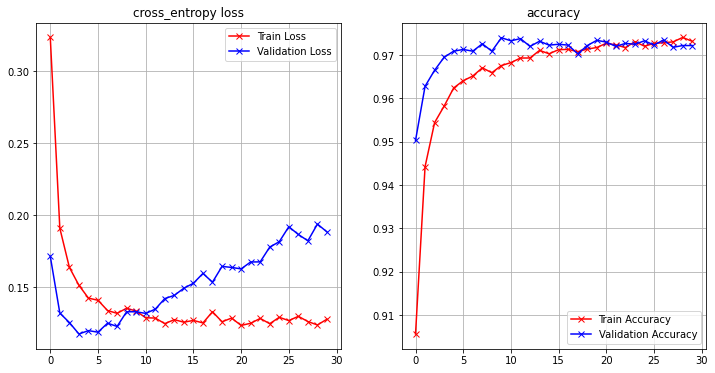

In [17]:
def plot_loss_accuracy(history):
    fig = plt.figure(figsize=(12, 6))
    ax = fig.add_subplot(1, 2, 1)
    ax.plot(history.history["loss"],'r-x', label="Train Loss")
    ax.plot(history.history["val_loss"],'b-x', label="Validation Loss")
    ax.legend()
    ax.set_title('cross_entropy loss')
    ax.grid(True)


    ax = fig.add_subplot(1, 2, 2)
    ax.plot(history.history["accuracy"],'r-x', label="Train Accuracy")
    ax.plot(history.history["val_accuracy"],'b-x', label="Validation Accuracy")
    ax.legend()
    ax.set_title('accuracy')
    ax.grid(True)
    

plot_loss_accuracy(history)

## Assignment
### PART-1: Build your own model
Use the Keras "Sequential" functionality to build `model_2` with the following specifications:

1. Two hidden layers.
2. First hidden layer of size 32, and second of size 48 neurons.
3. Dropout of 0.3 at each layer.
4. How many parameters does your model have?  How does it compare with model_1?
5. Train this model for 40 epochs with ADAM at a learning rate of 0.0015 and a batch size of 16.
6. Evaluate the test results.




In [18]:
### Our model (2 hidden layer which are 32 and 42 neuron with dropout .3)
model_2 = Sequential()
model_2.add(Dense(32, activation='relu', input_shape=(784,)))
model_2.add(Dropout(0.3))
model_2.add(Dense(48, activation='relu'))
model_2.add(Dropout(0.3))
model_2.add(Dense(10, activation='softmax'))

In [19]:
# Model Summary
model_2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 32)                25120     
                                                                 
 dropout_1 (Dropout)         (None, 32)                0         
                                                                 
 dense_3 (Dense)             (None, 48)                1584      
                                                                 
 dropout_2 (Dropout)         (None, 48)                0         
                                                                 
 dense_4 (Dense)             (None, 10)                490       
                                                                 
Total params: 27,194
Trainable params: 27,194
Non-trainable params: 0
_________________________________________________________________


We have 27194 parameters in total. There is almost a half of parameters when we compare with the model_1 parameter. Normally Once the layer and neuron size increased, parameters increased. For model 1, at the first layer we have 64 layers, so that we have more parameters than model_2. However, because of dropouts, for second layer, we have less parameters even if we have more neurons.

In [20]:
# Compile the model with Adam optimizer and .0015 learning rate
learning_rate = .0015
opt=keras.optimizers.Adam(learning_rate=learning_rate)
model_2.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

In [21]:
# Fit the model 16 Batch size and 40 epochs
batch_size = 16  
epochs = 40
history = model_2.fit(
    x_train, y_train,
    batch_size=batch_size,
    epochs=epochs,
    verbose=1,
    validation_data=(x_test, y_test))

Epoch 1/40
3750/3750 [==============================] - 3s 659us/step - loss: 0.5599 - accuracy: 0.8241 - val_loss: 0.2313 - val_accuracy: 0.9322
Epoch 2/40
3750/3750 [==============================] - 2s 642us/step - loss: 0.3751 - accuracy: 0.8865 - val_loss: 0.1875 - val_accuracy: 0.9437
Epoch 3/40
3750/3750 [==============================] - 3s 667us/step - loss: 0.3310 - accuracy: 0.8992 - val_loss: 0.1748 - val_accuracy: 0.9497
Epoch 4/40
3750/3750 [==============================] - 2s 655us/step - loss: 0.3087 - accuracy: 0.9071 - val_loss: 0.1667 - val_accuracy: 0.9505
Epoch 5/40
3750/3750 [==============================] - 2s 652us/step - loss: 0.2929 - accuracy: 0.9122 - val_loss: 0.1645 - val_accuracy: 0.9525
Epoch 6/40
3750/3750 [==============================] - 2s 649us/step - loss: 0.2808 - accuracy: 0.9154 - val_loss: 0.1603 - val_accuracy: 0.9520
Epoch 7/40
3750/3750 [==============================] - 2s 649us/step - loss: 0.2778 - accuracy: 0.9176 - val_loss: 0.1508 -

In [22]:
# Find accuracy and loss of test data
score = model_2.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.1461879462003708
Test accuracy: 0.9596999883651733


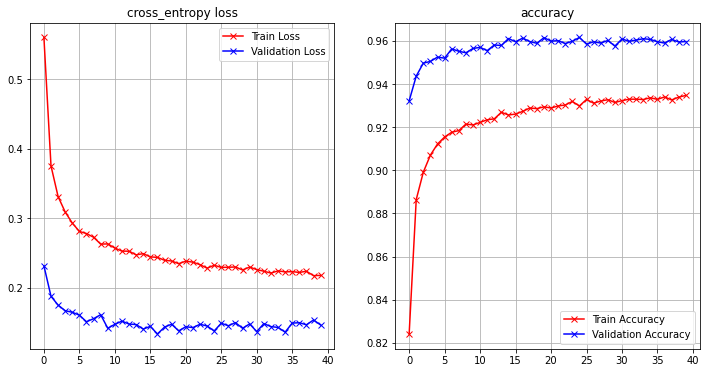

In [23]:
# Plot loss and accuracy of test and train datas
def plot_loss_accuracy(history):
    fig = plt.figure(figsize=(12, 6))
    ax = fig.add_subplot(1, 2, 1)
    ax.plot(history.history["loss"],'r-x', label="Train Loss")
    ax.plot(history.history["val_loss"],'b-x', label="Validation Loss")
    ax.legend()
    ax.set_title('cross_entropy loss')
    ax.grid(True)


    ax = fig.add_subplot(1, 2, 2)
    ax.plot(history.history["accuracy"],'r-x', label="Train Accuracy")
    ax.plot(history.history["val_accuracy"],'b-x', label="Validation Accuracy")
    ax.legend()
    ax.set_title('accuracy')
    ax.grid(True)
    

plot_loss_accuracy(history)

### PART-2: Think about the following questions

1) How do model_1 and model_2 compare?  Which do you prefer?  If you were going to put one into production, which would you choose and why?

2) Compare the trajectories of the loss function on the training set and test set for each model?  How do they compare?  What does that suggest about each model?  Do the same for accuracy.  Which do you think is more meaningful, the loss or the accuracy?

3) Suggest an improvement to model_2 (changing structure, learning rate, number of epochs, etc.) that you think will result in a better model.  Try it out below?  How much improvement can you achieve?

1. We can compare model_1 and model_2 by looking at test accuracy and loss functions. While the test accuracy of model_1 is 0.97, model_2 is 0.95, and loss function is 0.18 for model_1, 0.14 for model_2.
When we consider of two model, the second model is more suitable for putting into a production since the loss is less.

2. To compare the loss and accuracy, we can use some trajectory graphics. When we considered trajectory of model_1, train loss decreasing and validation loss starting to increasing after a certain period.
That means, our model is overfitting. So, for the training part, our model gives good performance for training datas, but when we test our data for the test data, the model will fail. So, we can already see the situation in the accuracy graphics. After a certain period, the validation accuracy starting to decrease. To avoid the overfitting, we can add more data to our model or apply regularization. On the other hand, model_2 is a good model. So that, 
we can use this model. Also, we can carefully add more neurons or epoch to increase the accuracy but we should make sure to avoid complex model. Loss function is more meaningful to make a comparision because we can see our model clearly there is an overfitting or underfitting situations.

3. Removing the second dropout and reduce the epoch size from 40 to 20, we can have better results. So, the accuracy has increased the .96, and the losses are reduce for both training and validation data.

In [57]:
model_3= Sequential()
model_3.add(Dense(32, activation="relu",input_shape=(784,)))
model_3.add(Dropout(0.3))
model_3.add(Dense(48, activation="relu"))
model_3.add(Dense(10,activation="softmax"))



In [58]:
model_3.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_22 (Dense)            (None, 32)                25120     
                                                                 
 dropout_4 (Dropout)         (None, 32)                0         
                                                                 
 dense_23 (Dense)            (None, 48)                1584      
                                                                 
 dense_24 (Dense)            (None, 10)                490       
                                                                 
Total params: 27,194
Trainable params: 27,194
Non-trainable params: 0
_________________________________________________________________


In [59]:
learning_rate = .0015
opt=keras.optimizers.Adam(learning_rate=learning_rate)
model_3.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

In [60]:
batch_size = 16 
epochs = 20
history = model_3.fit(
    x_train, y_train,
    batch_size=batch_size,
    epochs=epochs,
    verbose=1,
    validation_data=(x_test, y_test))

Epoch 1/20
3750/3750 [==============================] - 3s 658us/step - loss: 0.4462 - accuracy: 0.8604 - val_loss: 0.1854 - val_accuracy: 0.9437
Epoch 2/20
3750/3750 [==============================] - 2s 664us/step - loss: 0.3000 - accuracy: 0.9081 - val_loss: 0.1621 - val_accuracy: 0.9507
Epoch 3/20
3750/3750 [==============================] - 2s 656us/step - loss: 0.2708 - accuracy: 0.9159 - val_loss: 0.1569 - val_accuracy: 0.9524
Epoch 4/20
3750/3750 [==============================] - 2s 649us/step - loss: 0.2521 - accuracy: 0.9211 - val_loss: 0.1455 - val_accuracy: 0.9567
Epoch 5/20
3750/3750 [==============================] - 2s 646us/step - loss: 0.2386 - accuracy: 0.9254 - val_loss: 0.1415 - val_accuracy: 0.9563
Epoch 6/20
3750/3750 [==============================] - 2s 634us/step - loss: 0.2304 - accuracy: 0.9275 - val_loss: 0.1439 - val_accuracy: 0.9563
Epoch 7/20
3750/3750 [==============================] - 2s 631us/step - loss: 0.2230 - accuracy: 0.9298 - val_loss: 0.1334 -

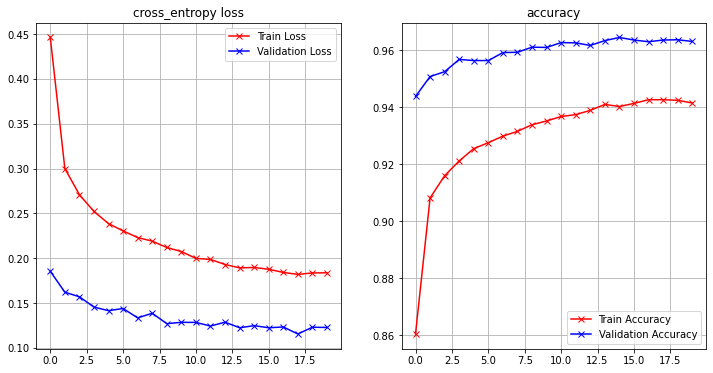

In [61]:
def plot_loss_accuracy(history):
    fig = plt.figure(figsize=(12, 6))
    ax = fig.add_subplot(1, 2, 1)
    ax.plot(history.history["loss"],'r-x', label="Train Loss")
    ax.plot(history.history["val_loss"],'b-x', label="Validation Loss")
    ax.legend()
    ax.set_title('cross_entropy loss')
    ax.grid(True)


    ax = fig.add_subplot(1, 2, 2)
    ax.plot(history.history["accuracy"],'r-x', label="Train Accuracy")
    ax.plot(history.history["val_accuracy"],'b-x', label="Validation Accuracy")
    ax.legend()
    ax.set_title('accuracy')
    ax.grid(True)
    

plot_loss_accuracy(history)